In [ ]:
# from google.colab import files

# upload = files.upload()


# Importing Data


In [ ]:
# !pip install numpy==1.23.5 gensim==4.3.1


In [ ]:
# !pip uninstall -y scipy
# !pip install scipy==1.10.1

Found existing installation: scipy 1.10.1
Uninstalling scipy-1.10.1:
  Successfully uninstalled scipy-1.10.1
  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompa

In [ ]:
# !wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tr.300.vec.gz


--2025-04-26 14:37:33--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.tr.300.vec.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.226.210.15, 13.226.210.25, 13.226.210.78, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.226.210.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1261500728 (1.2G) [binary/octet-stream]
Saving to: ‘cc.tr.300.vec.gz’

cc.tr.300.vec.gz    100%[===================>]   1.17G   165MB/s    in 8.7s    

2025-04-26 14:37:42 (138 MB/s) - ‘cc.tr.300.vec.gz’ saved [1261500728/1261500728]



In [3]:
import pandas as pd

# Kullandığımız veri setindeki satırları "|" ayıracı ile ayırıyoruz.
df = pd.read_csv('/content/preprocessed_train_40k.csv')
df = df[["text", "label"]]
df.head()

,text,label
0,gercekten sizin hikayelerinizi izleyerek mi ye...,0
1,coook cok bi baklava bi sen zaten,0
2,sn dukel ataturkun karma ile baslattigi siyasi...,0
3,konfederasyonumuzun aile ve sosyal politikalar...,0
4,hakemler tarih yaziyorlar kisiye karsi 32 onde...,1


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Veri seti hakkında bilgileri yazdırdık.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42398 entries, 0 to 42397
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    42396 non-null  object
 1   label   42398 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 662.6+ KB


([<matplotlib.patches.Wedge at 0x7ae4857b3e10>,
 [Text(-1.0941706636813076, -0.11309535242089684, 'Zararsiz'),
  Text(1.0941707077221812, 0.11309492633509963, 'Zararli')],
 [Text(-0.5968203620079859, -0.06168837404776191, '53.3%'),
  Text(0.5968203860302805, 0.06168814163732706, '46.7%')])

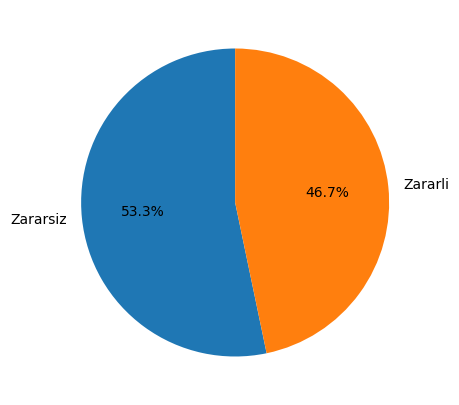

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)

# OTHER kategorisindeki veri adetini hesapladik.
positive = len(df[df['label'] == 0])
# (RACIST+INSULT+PROFANITY+SEXIST) kategorisindeki veri adetini hesapladik.
negative = len(df[df['label'] == 1])
# Dairesel grafikteki verilerimizi ayarladık.
pie_y = [positive, negative]
# Dairesel grafikteki verilerimizin adını ayarladık.
pie_labels = ["Zararsiz", "Zararli"]

# Dairesel grafiğimizi oluşturduk.
plt.pie(pie_y, labels=pie_labels, startangle=90, autopct='%1.1f%%')

# Her bir kategorideki veri adeti

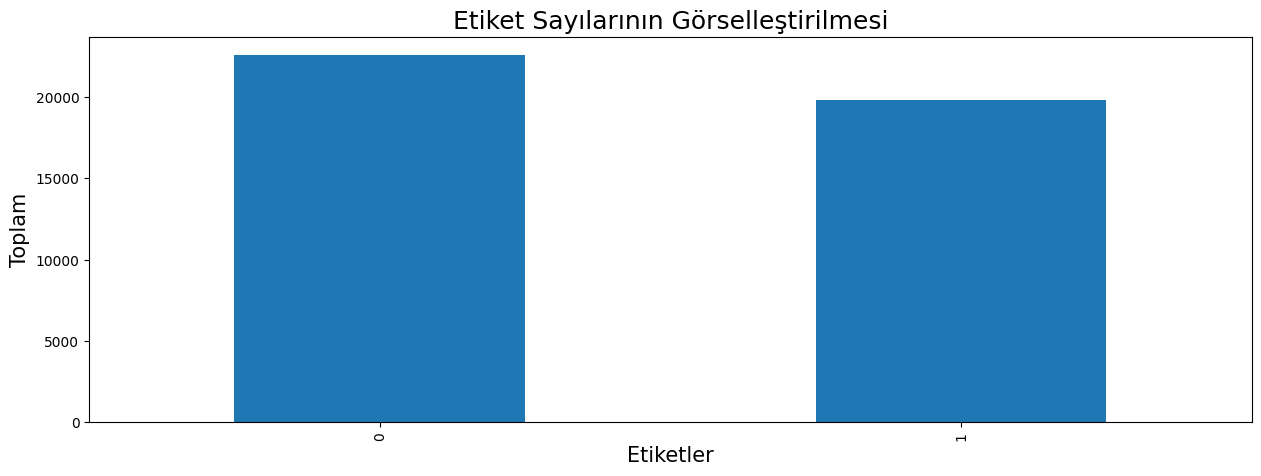

In [ ]:
from collections import Counter
# TARGET sütunundaki kategorileri bulduk.
tags = Counter(df["label"]).keys()
# TARGET sütunundaki kategorilerin adetini bulduk.
tags_len = Counter(df["label"]).values()

# Kategori ismi ve adet sayısını veri seti haline getirdik.
tag_df = pd.DataFrame(zip(tags, tags_len), columns=["Sinif", "Toplam"])
# Plot grafiğimizi oluşturduk.
tag_df.plot(x="Sinif", y="Toplam", kind="bar", legend=False, grid=False, figsize=(15,5))
# Plot grafiğimizin başlığını ayarladık.
plt.title("Etiket Sayılarının Görselleştirilmesi", fontsize=18)
# Plot grafiğimizin x ekseni başlığını ayarladık.
plt.xlabel("Etiketler", fontsize=15)
# Plot grafiğimizin y ekseni başlığını ayarladık.
plt.ylabel("Toplam", fontsize=15)
# Plot grafiğimizi ekrana yazdırdık.
plt.show()

# Temizlemeden önceki en sık kullanılan kelimeler

In [ ]:
import nltk
import string
# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Bir kategorideki en sık geçen kelimeleri bulmaya yarayan fonksiyonumuzu tanımladık.
def word_freq(CATEGORY):
  # Parametre olarak verilen kategoriyi kullanarak veri setimizi oluşturduk.
  freq_df = df[df['label'] == CATEGORY]
  # Kategorimizin text sınıfındaki satırlardaki kelimeleri bir değişkene aktardık.
  freq_words = freq_df["text"].tolist()
  # The error is likely due to some values in the "text" column being floats or NaNs.
  # This line converts all elements of freq_words to strings before applying lower(),
  # preventing the AttributeError.
  freq_words = [str(i).lower() for i in freq_words]
  freq_punc = []
  # Dizimizdeki kelimelerin sıklığındaki noktalama işaretlerini saydık.
  for o in freq_words:
    freq_punc += nltk.word_tokenize(o)
  freq_punc = [o for o in freq_punc if o not in string.punctuation]
  freq_freq = Counter(freq_punc)
  # En sık geçen 15 kelimeyi bir değişkene atadık.
  freq_top = freq_freq.most_common(15)


  words = [word for word, _ in freq_top]

  counts = [counts for _, counts in freq_top]

  # Sütun grafiğimizi oluşturduk.
  plt.bar(words, counts)
  # Sütun grafiğimizin başlığını ayarladık.
  plt.title(f"{CATEGORY} SINIFINDAKI EN SIK GECEN 15 KELIME")
  # Sütun grafiğimizin y ekseni başlığını ayarladık.
  plt.ylabel("Frekans")
  # Sütun grafiğimizin x ekseni başlığını ayarladık.
  plt.xlabel("Kelimeler")
  # Sütün grafiğimizi ekrana bastırdık.
  plt.show()

  # WordCloud'da kullanmak için en sık geçen kelimeleri döndürdük.
  return freq_top

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


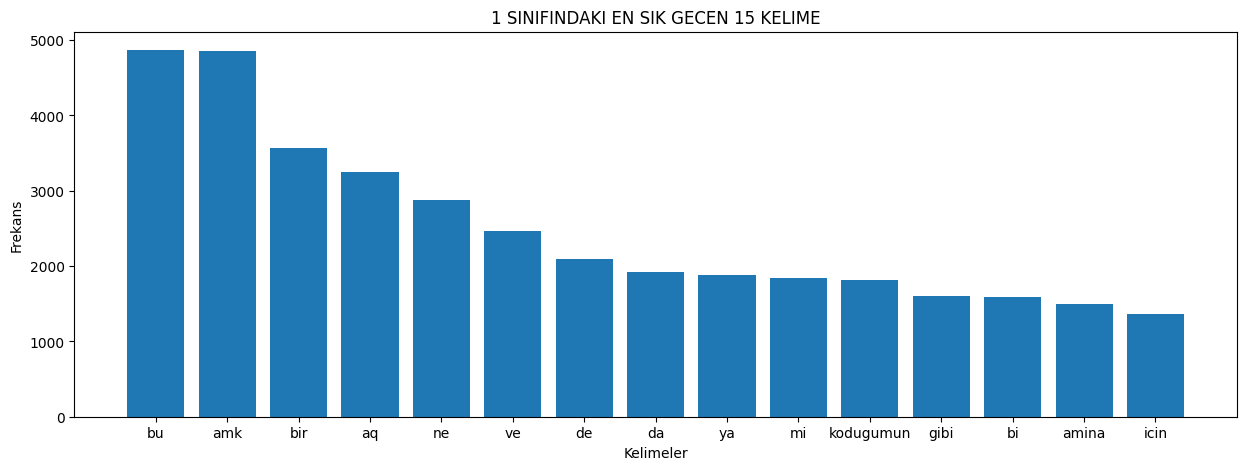

In [ ]:
# 1 kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
negative_top = word_freq(1)

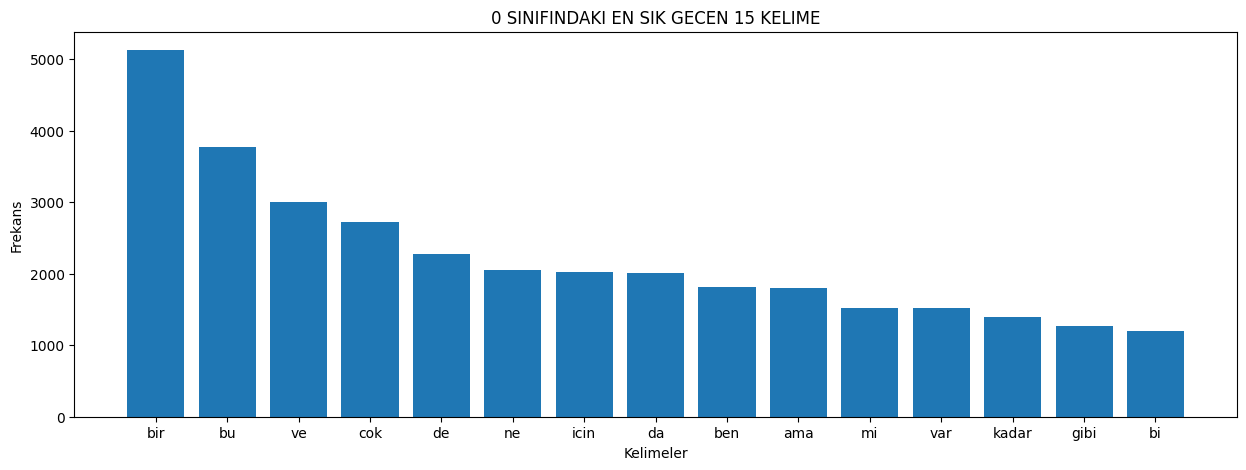

In [ ]:
# 0 kategorisindeki en sık geçen 15 kelimeyi gösteren grafiği ekrana yazdırdık.
positive_top = word_freq(0)

In [ ]:
#from sklearn.preprocessing import LabelEncoder
## LabelEncoder kullanarak "target" sütunumuza dönüşüm yaptırdık.
#le = LabelEncoder().fit(df["label"])
## "Name Mapping" işlemini tanımladık.
#le_nm = dict(zip(le.classes_, le.transform(le.classes_)))
## Veri setimizde "labels" adında sütun oluşturarak "target" sütununa "Name Mapping" işlemi yaparak "labels" sütunu altına aktardık.
#df["labels"] = df["label"].apply(lambda x: le_nm[x])
## "id", "text", "target" sütunlarını veri setimizden çıkardık.
#df = df.drop(['label'], axis=1)

In [5]:
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import pickle

In [6]:
import json

class Tokenizer:
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}

    def fit(self, texts):
        words = set()
        for text in texts:
            text = str(text)
            words.update(text.lower().split())
        self.word2idx = {word: idx+1 for idx, word in enumerate(sorted(words))}
        self.word2idx['<PAD>'] = 0
        self.idx2word = {str(idx): word for word, idx in self.word2idx.items()}  # JSON için key'leri string yap

    def encode(self, text, max_len=20):
        text = str(text)
        tokens = text.lower().split()
        encoded = [self.word2idx.get(token, 0) for token in tokens]
        if len(encoded) < max_len:
            encoded += [0] * (max_len - len(encoded))
        else:
            encoded = encoded[:max_len]
        return encoded

    def save(self, path):
        with open(path, 'w', encoding='utf-8') as f:
            json.dump({'word2idx': self.word2idx, 'idx2word': self.idx2word}, f, ensure_ascii=False, indent=4)

    @staticmethod
    def load(path):
        with open(path, 'r', encoding='utf-8') as f:
            data = json.load(f)
            tokenizer = Tokenizer()
            tokenizer.word2idx = {k: int(v) for k, v in data['word2idx'].items()}
            tokenizer.idx2word = data['idx2word']
            return tokenizer


# Tokenizer'ı eğit ve kaydet
tokenizer = Tokenizer()
tokenizer.fit(df['text'].values)
tokenizer.save('tokenizer.json')  # JSON olarak kaydet

In [7]:
# Tokenizer'ı JSON dosyasından yükle
tokenizer = Tokenizer.load("tokenizer.json")

MAX_LEN = 20  # sabit uzunluk

# Token bazlı Dataset sınıfı
class TokenDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len=20):
        self.labels = dataframe["label"].values
        self.texts = [tokenizer.encode(text, max_len=max_len) for text in dataframe["text"]]

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        text_tensor = torch.tensor(self.texts[idx], dtype=torch.long)  # (max_len,)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return text_tensor, label

# Dataset oluştur
dataset = TokenDataset(df, tokenizer, max_len=MAX_LEN)

# Örnek kontrol
sample_x, sample_y = dataset[0]
print("Örnek indeks şekli:", sample_x.shape)
print("Etiketi:", sample_y)

Örnek indeks şekli: torch.Size([20])
Etiketi: tensor(0)


In [ ]:
# Örnek bir cümle seçelim
example_sentence = "bu ürün çok kötü"

# Cümleyi vektörleştirelim
vector = sentence_to_vec(example_sentence, fasttext_model)

# Vektörü yazdıralım
print(vector)
print(f"Vektör boyutu: {vector.shape}")


[[ 0.17039999  0.0893     -0.19750001 ...  0.1169     -0.004
  -0.0674    ]
 [ 0.1079      0.0117      0.1242     ... -0.0176     -0.078
   0.0753    ]
 [ 0.0222     -0.0735     -0.0031     ... -0.0133     -0.0151
   0.0036    ]
 ...
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]
Vektör boyutu: (20, 300)


In [8]:
def train_validate_test_split(df):
    # Rastgelelik durumu.
    np.random.seed(4242)
    # Diziyi rastgele permute eder.
    perm = np.random.permutation(df.index)
    # Veri setinin %60'ının sayısal değeri hesaplandı.
    train_end = int(.6 * len(df.index))
    # Veri setinin %20'sinin sayısal değeri hesaplandı.
    validate_end = int(.2 * len(df.index)) + train_end
    # Veri setinin %60'ını train etmek için ayırdık.
    train = df.iloc[perm[:train_end]]
    # Veri setinin %20'sini validation etmek için ayırdık.
    validate = df.iloc[perm[train_end:validate_end]]
    # Veri setinin %20'sini test etmek için ayırdık.
    test = df.iloc[perm[validate_end:]]
    # train, validation, test veri setlerini döndür.
    return train, validate, test

# Train, Validation ve Test için veri setlerimiz oluşturduk.
df_train, df_validation, df_test = train_validate_test_split(df)
# Train, Validation ve Test için oluşturduğumuz veri setlerinin uzunluğunu ekrana yazdırdık. (%60 - %20 - %20)
print(len(df_train), len(df_validation), len(df_test))

25438 8479 8481


In [9]:
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.optim as optim

# Model tanımı
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim=128, hidden_dim=128, output_dim=2, num_layers=1):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, (h_n, c_n) = self.lstm(embedded)
        output = self.fc(h_n[-1])
        return output



In [11]:
# Parametreler
MAX_LEN = 20
BATCH_SIZE = 32
EPOCHS = 10
LR = 1e-3
VOCAB_SIZE = len(tokenizer.word2idx)

# Cihaz
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset ve Dataloader
train_dataset = TokenDataset(df_train, tokenizer, MAX_LEN)
val_dataset = TokenDataset(df_validation, tokenizer, MAX_LEN)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)

# Model, loss ve optimizer
model = LSTMClassifier(vocab_size=VOCAB_SIZE).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)

# Eğitim döngüsü
for epoch in range(EPOCHS):
    model.train()
    total_train_loss = 0
    total_train_acc = 0

    for texts, labels in train_loader:
        texts, labels = texts.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(texts)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()
        total_train_acc += (outputs.argmax(dim=1) == labels).sum().item()

    model.eval()
    total_val_loss = 0
    total_val_acc = 0
    with torch.no_grad():
        for texts, labels in val_loader:
            texts, labels = texts.to(device), labels.to(device)
            outputs = model(texts)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()
            total_val_acc += (outputs.argmax(dim=1) == labels).sum().item()

    print(f"Epoch {epoch+1}/{EPOCHS}")
    print(f"Train Loss: {total_train_loss/len(train_dataset):.4f}, Accuracy: {total_train_acc/len(train_dataset):.4f}")
    print(f"Val Loss: {total_val_loss/len(val_dataset):.4f}, Accuracy: {total_val_acc/len(val_dataset):.4f}")

Epoch 1/10
Train Loss: 0.0144, Accuracy: 0.7665
Val Loss: 0.0111, Accuracy: 0.8441
Epoch 2/10
Train Loss: 0.0096, Accuracy: 0.8746
Val Loss: 0.0102, Accuracy: 0.8568
Epoch 3/10
Train Loss: 0.0065, Accuracy: 0.9232
Val Loss: 0.0104, Accuracy: 0.8631
Epoch 4/10
Train Loss: 0.0038, Accuracy: 0.9607
Val Loss: 0.0126, Accuracy: 0.8387
Epoch 5/10
Train Loss: 0.0021, Accuracy: 0.9806
Val Loss: 0.0156, Accuracy: 0.8411
Epoch 6/10
Train Loss: 0.0013, Accuracy: 0.9877
Val Loss: 0.0210, Accuracy: 0.8198
Epoch 7/10
Train Loss: 0.0008, Accuracy: 0.9928
Val Loss: 0.0217, Accuracy: 0.8144
Epoch 8/10
Train Loss: 0.0005, Accuracy: 0.9949
Val Loss: 0.0268, Accuracy: 0.8322
Epoch 9/10
Train Loss: 0.0003, Accuracy: 0.9974
Val Loss: 0.0264, Accuracy: 0.8462
Epoch 10/10
Train Loss: 0.0004, Accuracy: 0.9965
Val Loss: 0.0243, Accuracy: 0.8273


In [12]:
# Modeli kaydet
torch.save(model, "tokenizer_lstm_deneme.pt")

In [13]:
# Test veri setini oluştur (TokenDataset ile)
test = TokenDataset(df_test, tokenizer, max_len=20)

# DataLoader
tdl = torch.utils.data.DataLoader(test, batch_size=2)

# Cihaz seçimi (otomatik)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

# Test doğruluk hesaplaması
total_test_accuracy = 0
with torch.no_grad():
    for test_input, test_label in tdl:
        test_input = test_input.to(device)
        test_label = test_label.to(device)
        output = model(test_input)
        test_accuracy = (output.argmax(dim=1) == test_label).sum().item()
        total_test_accuracy += test_accuracy

test_accuracy = total_test_accuracy / len(tdl.dataset)
print(f'Test Accuracy: {test_accuracy:.3f}')


Test Accuracy: 0.823


In [17]:
def predict_sentence(model, sentence, tokenizer, device='cuda'):
    model.eval()  # Modeli eval moduna alıyoruz (dropout vs kapansın diye)

    # Cümleyi encode ederek vektöre çevir (Tokenizer kullanarak)
    vec = tokenizer.encode(sentence, max_len=20)  # Tokenizer ile cümleyi encode et
    vec = torch.tensor(vec, dtype=torch.long).to(device)  # Tensora çevir
    vec = vec.unsqueeze(0)  # (1, max_len) -> batch dimension

    with torch.no_grad():
        output = model(vec)  # Modelden çıktı al
        prediction = output.argmax(dim=1).item()  # En yüksek skorlu sınıfı seç

    return prediction  # 0 veya 1 döner

# Örnek cümle
sentence = "hava güzel"
result = predict_sentence(model, sentence, tokenizer)

print("Tahmin:", result)  # 0 veya 1 döner


Tahmin: 0


In [14]:
# def predict(model, sentence):
#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model = model.to(device)
#     model.eval()

#     with torch.no_grad():
#         # Cümleyi FastText vektörüne çeviriyoruz
#         sentence_vec = sentence_to_vec(sentence, fasttext_model)
#         sentence_vec = torch.tensor(sentence_vec, dtype=torch.float32).unsqueeze(0).to(device)  # Batch dimension ekliyoruz

#         output = model(sentence_vec)

#         return output.argmax(dim=1).item()


In [ ]:
# from sklearn.metrics import classification_report

# # Gerçek label'lar
# actuals = df_test['label']

# # Tahminler
# predicted = [predict(model, text) for text in df_test['text'].values]

# # Sonuç
# print(classification_report(actuals, predicted))


              precision    recall  f1-score   support

           0       0.86      0.93      0.89      4498
           1       0.91      0.83      0.87      3983

    accuracy                           0.88      8481
   macro avg       0.89      0.88      0.88      8481
weighted avg       0.88      0.88      0.88      8481



In [ ]:
#predict(model, "")

0

In [19]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(predicted, actuals, sub_classes, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    Confusion Matrix görselleştirmesi için fonksiyon.

    predicted: Modelin tahmin ettiği etiketler
    actuals: Gerçek etiketler
    sub_classes: Etiketlerin sınıfları
    title: Grafik başlığı
    cmap: Renk haritası
    """
    # Confusion Matrix oluştur
    confusion = confusion_matrix(actuals, predicted)

    plt.imshow(confusion, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(sub_classes))
    plt.xticks(tick_marks, sub_classes, rotation=90)
    plt.yticks(tick_marks, sub_classes)

    # Confusion matrix içindeki sayıları yaz
    for i, j in itertools.product(range(confusion.shape[0]), range(confusion.shape[1])):
        plt.text(j, i, format(confusion[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if confusion[i, j] > confusion.max() / 2. else "black")

    plt.rcParams["figure.figsize"] = (10, 8)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# Burada sub_classes listesini oluşturuyoruz
sub_classes = sorted(df_test['label'].unique())  # Etiketleri sırala

# Ve fonksiyonu çağırıyoruz
plot_confusion_matrix(predicted, actuals, sub_classes=sub_classes)


NameError: name 'predicted' is not defined

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# # Modelimize isim vererek Drive'a kaydettik.
# model_name = "bertVia40k.pt"
# path = F"/content/drive/My Drive/{model_name}"

# torch.save(model.state_dict(), path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
